# 1 Examples on SD model building and simulation

In [1]:
from ASDM.Engine import Structure
from ASDM.Utilities import plot_time_series
from IPython.display import Image

## Example 1: Goal-gap model

### Functionalities tested:
- Add stock, flow, and auxiliaries to model
- Run simulation and export the result
- Visualise simulation outcome by graph

In [2]:
class GoalGap(Structure):
    def __init__(self):
        super(GoalGap, self).__init__()
        self.add_stock("Stock", 100)
        self.add_aux("Goal", 20)
        self.add_aux("Adjustment_time", 5)
        self.add_aux("Gap", "Goal-Stock")
        self.add_flow("Flow", "Gap/Adjustment_time", flow_to="Stock")

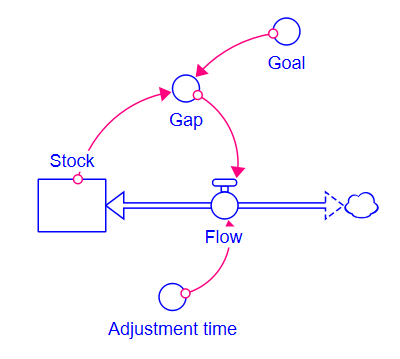

In [3]:
Image('Goal_gap_model.png')

In [4]:
goal_gap_model = GoalGap()
goal_gap_model.clear_last_run()
goal_gap_model.simulate(simulation_time=20, dt=1)
df_goal_gap = goal_gap_model.export_simulation_result()
df_goal_gap

Engine: adding element: Stock equation: 100
Engine: adding element: Goal equation: 20
Engine: adding element: Adjustment_time equation: 5
Engine: adding element: Gap equation: Goal-Stock
Engine: adding element: Flow equation: Gap/Adjustment_time


,Stock,Goal,Adjustment_time,Gap,Flow
0,100.000000,20,5,-80.000000,-16.000000
1,84.000000,20,5,-64.000000,-12.800000
2,71.200000,20,5,-51.200000,-10.240000
3,60.960000,20,5,-40.960000,-8.192000
4,52.768000,20,5,-32.768000,-6.553600
5,46.214400,20,5,-26.214400,-5.242880
6,40.971520,20,5,-20.971520,-4.194304
7,36.777216,20,5,-16.777216,-3.355443
8,33.421773,20,5,-13.421773,-2.684355
9,30.737418,20,5,-10.737418,-2.147484


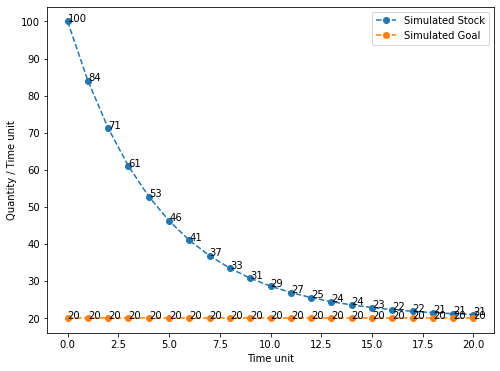

In [23]:
plot_time_series({
    "Stock":{"Simulated": df_goal_gap['Stock']},
    "Goal":{"Simulated": df_goal_gap['Goal']}
}, separate_ax=False)

## Example 2: Patient flow model

#### Functionalities tested:
- Support for non-linear functions such as MIN, MAX, enabled through built-in python functions
- Support for stochastic functions such as random binomial (rbinom), enabled through Scipy

In [24]:
class PatientFlow(Structure):
    def __init__(self):
        super(PatientFlow, self).__init__()
        self.add_stock("Waiting_list", 100)
        self.add_stock("In_hospital", 30)
        self.add_stock("In_community_care", 100)
        
        self.add_aux("Hospital_bed_capacity", 30)
        self.add_aux("Hospital_bed_vacancy", "Hospital_bed_capacity-In_hospital")
        self.add_aux("p_completion", 0.1)
        self.add_aux("p_leaving", 0.1)

        self.add_flow("GP_referrals", 3, flow_to="Waiting_list")
        self.add_flow(
            "Hospital_admission_rate", 
            "MIN(Waiting_list, MAX(Treatment_completion_rate, Hospital_bed_vacancy))",  # mimicing the non-negative stock behaviour
            flow_from="Waiting_list", 
            flow_to="In_hospital"
            )
        self.add_flow(
            "Treatment_completion_rate", 
            "rbinom(In_hospital, p_completion)", 
            flow_from="In_hospital", 
            flow_to="In_community_care"
            )
        self.add_flow(
            "Community_care_leaving_rate", 
            "rbinom(In_community_care, p_leaving)", 
            flow_from="In_community_care"
            )

        # mapping SD functions to Python functions
        self.custom_functions['MAX'] = max
        self.custom_functions['MIN'] = min

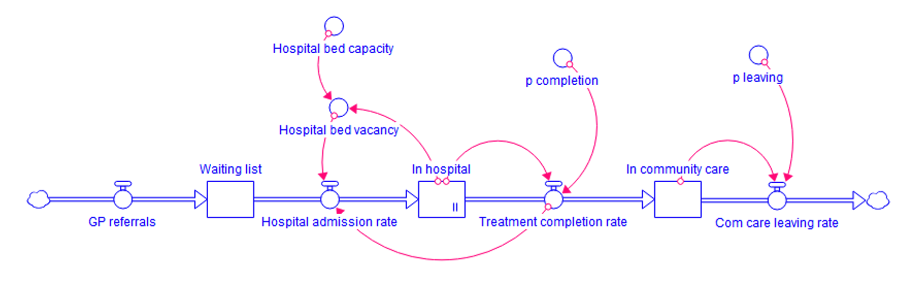

In [25]:
Image('Simplified_patient_flow_model.png')

In [26]:
patient_flow_model = PatientFlow()
patient_flow_model.clear_last_run()
patient_flow_model.simulate(simulation_time=20, dt=1)
df_patient_flow = patient_flow_model.export_simulation_result()
df_patient_flow

Engine: adding element: Waiting_list equation: 100
Engine: adding element: In_hospital equation: 30
Engine: adding element: In_community_care equation: 100
Engine: adding element: Hospital_bed_capacity equation: 30
Engine: adding element: Hospital_bed_vacancy equation: Hospital_bed_capacity-In_hospital
Engine: adding element: p_completion equation: 0.1
Engine: adding element: p_leaving equation: 0.1
Engine: adding element: GP_referrals equation: 3
Engine: adding element: Hospital_admission_rate equation: MIN(Waiting_list, MAX(Treatment_completion_rate, Hospital_bed_vacancy))
Engine: adding element: Treatment_completion_rate equation: rbinom(In_hospital, p_completion)
Engine: adding element: Community_care_leaving_rate equation: rbinom(In_community_care, p_leaving)


,Waiting_list,In_hospital,In_community_care,Hospital_bed_capacity,Hospital_bed_vacancy,p_completion,p_leaving,GP_referrals,Hospital_admission_rate,Treatment_completion_rate,Community_care_leaving_rate
0,100,30,100,30,0,0.1,0.1,3,3,3,8
1,100,30,95,30,0,0.1,0.1,3,6,6,13
2,97,30,88,30,0,0.1,0.1,3,3,3,16
3,97,30,75,30,0,0.1,0.1,3,4,4,5
4,96,30,74,30,0,0.1,0.1,3,4,4,9
5,95,30,69,30,0,0.1,0.1,3,3,3,9
6,95,30,63,30,0,0.1,0.1,3,3,3,5
7,95,30,61,30,0,0.1,0.1,3,2,2,5
8,96,30,58,30,0,0.1,0.1,3,2,2,11
9,97,30,49,30,0,0.1,0.1,3,2,2,5


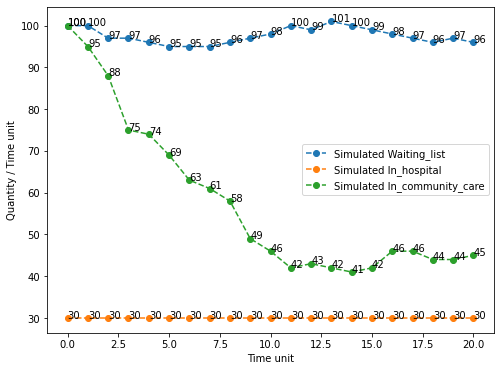

In [27]:
plot_time_series({
    "Waiting_list": {"Simulated": df_patient_flow['Waiting_list']},
    "In_hospital": {"Simulated": df_patient_flow['In_hospital']},
    "In_community_care": {"Simulated": df_patient_flow['In_community_care']}
    }, separate_ax=False)